In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('house_rental_data.csv')
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
cleaned_data = data.drop(['Unnamed: 0', 'Price'], axis=1)
cleaned_data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2
...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1
643,1707.840,3,14,3,2,2


In [6]:
# Standardize the data
scaler = StandardScaler()
cleaned_data_scaled = scaler.fit_transform(cleaned_data)
cleaned_data_scaled

array([[-0.45639303, -1.01489712, -0.77234699, -0.82895634,  0.40269363,
         0.27691822],
       [ 0.79179777, -0.24204158, -0.77234699,  1.15132825,  0.40269363,
         0.27691822],
       [-0.50743429, -0.24204158, -0.77234699, -0.82895634,  0.40269363,
        -1.18711665],
       ...,
       [-1.02712711,  1.81890652,  0.62980285, -1.81909863, -1.76178464,
        -1.18711665],
       [ 0.23498403, -0.7572786 ,  0.62980285,  0.16118595,  0.40269363,
         0.27691822],
       [-0.19654662,  0.01557693, -0.77234699,  0.16118595,  0.40269363,
        -1.18711665]])

In [10]:
# Find the optimal value of k using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cleaned_data_scaled)
    sse.append(kmeans.inertia_)



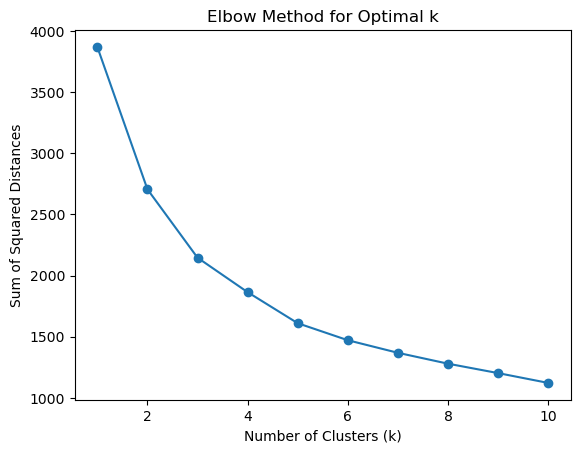

In [11]:
# Plot the Elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [13]:
# Based on the Elbow Method, choose the optimal value of k
optimal_k = 3
# Apply K-Means clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(cleaned_data_scaled)

In [15]:
# Display the cluster information along with the original data
clustered_data = pd.concat([data, cleaned_data['Cluster']], axis=1)
print(clustered_data.head())

   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  Cluster  
0  62000        1  
1  78000        1  
2  58000        0  
3  45000        1  
4  45000        2  


In [16]:
# Store the clustered data to a new CSV file
clustered_data.to_csv('clustered_data.csv', index=False)

In [17]:
clustered_data=pd.read_csv('clustered_data.csv')
clustered_data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
0,1,1177.698,2,7,2,2,2,62000,1
1,2,2134.800,5,7,4,2,2,78000,1
2,3,1138.560,5,7,2,2,1,58000,0
3,4,1458.780,2,7,3,2,2,45000,1
4,5,967.776,11,14,3,2,2,45000,2
...,...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000,2
641,645,377.148,4,10,1,1,1,24800,0
642,646,740.064,13,14,1,1,1,45000,0
643,647,1707.840,3,14,3,2,2,65000,1
